In [1]:
from collections import Counter
import matplotlib.pyplot as plt
import random
import math

In [2]:
#num_friends = [random.randint(1,100) for i in range(100) ]
num_friends = [100, 49, 41, 40, 25, 1, 1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 4,
 4, 4, 5, 5, 6, 6, 7, 7, 7, 8, 8, 10, 11, 11, 12, 12,
 15, 15, 15, 18, 20, 20]
daily_min = [1, 39, 37, 35, 28, 7, 9, 8, 7, 8, 10, 11, 12, 9, 13, 15, 14,
 14, 17, 16, 15, 19, 16, 21, 17, 19, 22, 18, 21, 20, 24, 23, 22, 25,
 25, 27, 29, 28, 30, 32]


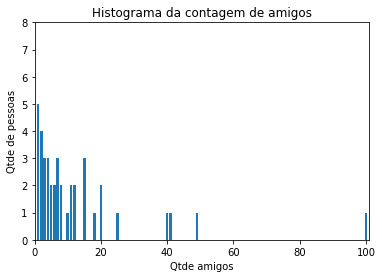

In [3]:
friend_counts = Counter(num_friends)
xs = range(101) # largest value is 100
ys = [friend_counts[x] for x in xs] # height is just # of friends
plt.bar(xs, ys)
plt.axis([0, 101, 0, 8])
plt.title("Histograma da contagem de amigos")
plt.xlabel("Qtde amigos")
plt.ylabel("Qtde de pessoas")
plt.show()

In [4]:
print("Tamanho da base:", len(num_friends))
print("Maior quantidade de amigos", max(num_friends))
print("Menor quantidade de amigos", min(num_friends))

Tamanho da base: 40
Maior quantidade de amigos 100
Menor quantidade de amigos 1


In [5]:
sorted_num_friends = sorted(num_friends)
print("Menor qtde de amigos =", sorted_num_friends[0])
print("Decima menor qtde de amigos =", sorted_num_friends[9])
print("Segunda maior qtde de amigos =", sorted_num_friends[-2])

Menor qtde de amigos = 1
Decima menor qtde de amigos = 3
Segunda maior qtde de amigos = 49


In [6]:
def media(x):
    return sum(x)/len(x)
print("A media de amigos =", media(num_friends))

A media de amigos = 12.675


In [8]:
def mediana(v):
    n = len(v)
    v_ordenado = sorted(v)
    i_centro = n // 2
    if n % 2 == 1:
        return v_ordenado(i_centro)
    else:
        i_centro_2 = i_centro - 1
        return (v_ordenado[i_centro_2] + v_ordenado[i_centro]) / 2

print("A mediana de amigos =", mediana(num_friends))


A mediana de amigos = 7.0


In [9]:
def quantile(x, p):
    """returns the pth-percentile value in x"""
    p_index = int(p * len(x))
    return sorted(x)[p_index]
#sorted(num_friends)

In [10]:
print(quantile(num_friends, 0.10)) # 1
print(quantile(num_friends, 0.25)) # 3
print(quantile(num_friends, 0.75)) # 15
print(quantile(num_friends, 0.90)) # 40


1
3
15
40


In [11]:
def mode(x):
    """returns a list, might be more than one mode"""
    counts = Counter(x)
    max_count = max(counts.values())
    return [x_i for x_i, count in counts.items()
        if count == max_count]
print(mode(num_friends)) 

[1]


In [12]:
def data_range(x):
    return max(x) - min(x)
data_range(num_friends) 

99

In [13]:
def de_mean(x):
    x_bar = media(x)
    return [x_i - x_bar for x_i in x]
def sum_of_squares(x):
    return sum([x_i * x_i for x_i in x])
def variance(x):
    n = len(x)
    deviations = de_mean(x)
    return sum_of_squares(deviations) / (n - 1)

In [14]:
print("Variância No amigos =", variance(num_friends))
print("Variância Tempo Online =", variance(daily_min))

Variância No amigos = 328.2762820512823
Variância Tempo Online = 80.22499999999998


In [15]:
def desvio_padrao(x):
    return math.sqrt(variance(x))
print(desvio_padrao(num_friends))

18.118396232870126


In [16]:
import numpy as np

In [17]:
notas = [[5, 8, 10, 7],
 [8, 6, 6, 10],
 [10, 9, 5, 10],
 [8, 10, 9, 4]]
print("Notas flatted = ", np.array(notas).flatten())
print("Variância = ", variance(np.array(notas).flatten()))
print("Desvio padrão = ",desvio_padrao(np.array(notas).flatten()))


Notas flatted =  [ 5  8 10  7  8  6  6 10 10  9  5 10  8 10  9  4]
Variância =  4.295833333333333
Desvio padrão =  2.0726392192886185


In [18]:
def dot(v, w):
    return sum(v_i * w_i
 for v_i, w_i in zip(v, w))
def covariance(x, y):
    n = len(x)
    return dot(de_mean(x), de_mean(y)) / (n - 1)
covariance(num_friends, daily_min)

44.7173076923077

In [19]:
def correlation(x, y):
    stdev_x = desvio_padrao(x)
    stdev_y = desvio_padrao(y)
    if stdev_x > 0 and stdev_y > 0:
        return covariance(x, y) / stdev_x / stdev_y
    else:
        return 0 # if no variation, correlation is zero

correlation(num_friends, daily_min)

0.2755503912677958

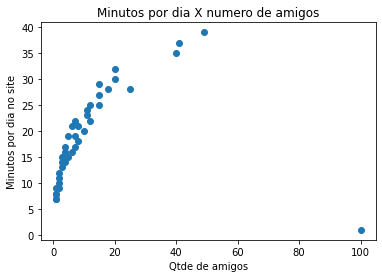

In [20]:
plt.scatter(num_friends, daily_min)
plt.title("Minutos por dia X numero de amigos")
plt.xlabel("Qtde de amigos")
plt.ylabel("Minutos por dia no site")
plt.show()


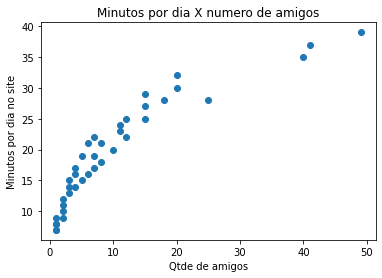

In [21]:
plt.scatter(num_friends[1:], daily_min[1:])
plt.title("Minutos por dia X numero de amigos")
plt.xlabel("Qtde de amigos")
plt.ylabel("Minutos por dia no site")
plt.show()

In [22]:
print("Correlação com outlier: ",correlation(num_friends, daily_min), " -> Baixa
correlação")
print("Correlação sem outlier: ",correlation(num_friends[1:], daily_min[1:]), "Alta correlação")

SyntaxError: EOL while scanning string literal (<ipython-input-22-bcc43b5fa7c8>, line 1)

In [24]:
print("Correlação com outlier: ",correlation(num_friends, daily_min), " -> Baixa correlação")
print("Correlação sem outlier: ",correlation(num_friends[1:], daily_min[1:]), " -> Alta correlação")

Correlação com outlier:  0.2755503912677958  -> Baixa correlação
Correlação sem outlier:  0.9014335836717391  -> Alta correlação
